# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
#CodeRead

data_folder = '../Data_contest/dataset/'


genome_scores_df=pd.read_csv(data_folder+'genome_scores.csv') # Large (500MB)
movies_df=pd.read_csv(data_folder+'movies.csv')
train_df=pd.read_csv(data_folder+'train.csv') # Large 500MB
validation_df = pd.read_csv(data_folder+'validation.csv') 


In [3]:
#CodeRead

# create movie rating dataset from train

# Feature vector for the 10000 movies, each with a 1128 dimensional vector. 
# If a movie doesn't appear in genome_scores we make it simply the 0 vector.
X=np.zeros((10000,1128)) 
movies_with_featvecs=set(genome_scores_df['movieId'])
# The average rating, for each of the movies in the training set. 
# -1 if it is not in the train set.
rating_movies = -1*np.ones(10000) 

# Each movie, is labelled +1 or -1 based on whether it is a comedy or not
comedy = np.zeros(10000) 

for i in range(10000):
    if i not in movies_with_featvecs:
        continue
    temp = genome_scores_df[genome_scores_df['movieId']==i]
    feat_vec= np.array(temp['relevance'])
    X[i,:]=feat_vec

for i in range(10000):
    temp = train_df[train_df['movieId']==i]
    if len(temp)==0:
        continue
    ratings_curr_movies = temp['rating']
    rating_movies[i] = np.mean(ratings_curr_movies)

for i in range(10000):
    temp = movies_df[movies_df['movieId']==i]
    if len(temp)==0:
        continue
    temp = temp['genres'].values[0]
    temp = temp.split('|')
    comedy[i] = 'Comedy' in temp
    comedy[i] = 2*comedy[i] -1


In [4]:
np.array(train_df['rating']).mean()

3.3601078084681526

# Problem 1. K-Nearest Neighbours

Run k-Nearest neighbours on the binary classification dataset below, for classifiying whether a given movie is a comedy or not. The train and test feature vectors are given by X_train, X_test and the train and test ratings are Y_train and Y_test. 

Run k-Nearest neighbours for different k values (1,3,7,15,31,63) and report accuracies in the next cell. 

In [5]:
#CodeWrite cell

X_train = np.array(X[:8000,])
X_test = np.array(X[8000:])

Y_train=np.array(comedy[:8000])
Y_test=np.array(comedy[8000:])

#calculating the distance using L2 norm

dist = np.zeros((X_test.shape[0],X_train.shape[0]))
for i in range(X_test.shape[0]):
    temp = X_train - X_test[i]
    dis = np.linalg.norm(temp,axis = 1)
    dist[i,:]=dis

#Applying KNN
k = [1,3,7,15,31,63]
a = np.arange(0,len(X_test))
maxi = np.max(dist)
for j in k:
    temp_dist = np.copy(dist)
    Y_pred = np.zeros(len(X_test))
    for m in range(j):
        min_ind = np.argmin(temp_dist,axis = 1)
        temp_dist[a,min_ind] = maxi
        Y_pred = Y_pred + Y_train[min_ind]
    Y_pred[Y_pred>0] = 1
    Y_pred[Y_pred<=0] = -1
    print("for k = "+str(j))
    print("accuracy = ",np.count_nonzero(Y_pred-Y_test == 0)/len(Y_test))


for k = 1
accuracy =  0.841
for k = 3
accuracy =  0.8645
for k = 7
accuracy =  0.869
for k = 15
accuracy =  0.866
for k = 31
accuracy =  0.863
for k = 63
accuracy =  0.8585


TextWrite cell. Report test accuracies for different k here.

## The accuracies obtained for various k values are :

|  k value      	|   Accuracy obtained    	|
|---------------	|------------------------	|
| 1             	| 0.841                  	|
| 3             	| 0.8645                 	|
| 7             	| 0.869                  	|
| 15            	| 0.866                  	|
| 31            	| 0.863                  	|
| 63            	| 0.8585                 	|

# Problem 2: PCA and regression

Take the regression dataset below, and perform linear regression after doing PCA on the feature vector. 

For each K in [4,32,256,1024] take the top k components and report the mean squared error on the test set below. 

For each K you can choose the regularisation hyperparameter $\lambda$ for linear regression using a 80-20 split of the training set. 

For each K above, report the best lambda and the mean squared error for this best lambda in the cell below the next.




In [6]:
# CodeWrite

X_all = X[rating_movies>0]
Y_all = rating_movies[rating_movies>0]

X_train = np.array(X_all[:7000])
Y_train = np.array(Y_all[:7000])
X_test = np.array(X_all[7000:])
Y_test = np.array(Y_all[7000:])
# splitting into train and validation
X_tr  = X_train[:5600]
Y_tr  = Y_train[:5600]
X_valid = X_train[5600:]
Y_valid = Y_train[5600:]

# pca on feature vector
#eigvals,eigvecs = np.linalg.eig(temp)
eigvals,eigvecs = np.linalg.eig(np.cov(X_tr,rowvar = False,bias = True))
# sorting the eig vecs
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
k = [4,32,256,1024]
m1 = X_tr.shape[0]
lamda_range = [1e-9,1e-7,1e-5,1e-3,1e-1,1,1e1,1e3,1e5]
#print(Y_test)
# X_tr_sh = X_tr - np.mean(X_tr,axis = 0)
# X_te_sh = X_test - np.mean(X_tr,axis = 0)
# X_va_sh = X_valid - np.mean(X_tr,axis = 0)
#lamda = 0
best_pars = []
m = np.mean(X_tr,axis = 0)
m = m.reshape((1,X_tr.shape[1]))
o = np.ones((X_tr.shape[0],1))
o_te = np.ones((X_test.shape[0],1))
X_tr_bar = np.dot(o,m)
X_te_bar = np.dot(o_te,m)
for j in k :
    V = eigvecs[:,:j]
    T_tr = np.dot(X_tr,V)
    T_va = np.dot(X_valid,V)
    T_te = np.dot(X_test,V)
    #     X_te_approx1 = np.dot(T_te,V.T)
    #     X_te_approx2 = np.dot(np.dot(X_te_bar,eigvecs[:,j:]),np.transpose(eigvecs[:,j:]))
    #     X_tr_approx1 = np.dot(T_tr,V.T)
    #     X_tr_approx2 = np.dot(np.dot(X_tr_bar,eigvecs[:,j:]),np.transpose(eigvecs[:,j:]))
    #     X_te_approx = X_te_approx1 + X_te_approx2
    #     X_tr_approx = X_tr_approx1 + X_tr_approx2
    #     m_s_e = np.sum((X_test-X_te_approx)**2)/len(X_test)
    #     print('mse for '+ str(j) +" components for test data = ",m_s_e)
    #print("sum of D-k eigen values = ",sum(eigvals[j:]))
    # T*W = Y
    best_lamda = 0
    best_mse = 10000
    
    for lamda in lamda_range :
        term1 = np.dot(T_tr.T,T_tr) + m1*lamda/2*np.identity(j)
        term2 = np.dot(np.transpose(T_tr),Y_tr)
        W_hat = np.dot(np.linalg.inv(term1),term2)
        #validation
        Y_pred_val = np.dot(T_va,W_hat)
        mse = np.sum((Y_valid-Y_pred_val)**2)/1400
        #print(mse)
        if(mse<=best_mse):
            best_mse = mse
            best_lamda = lamda
    best_pars.append(best_lamda)
    # testing 
    term1 = np.dot(np.transpose(T_tr),T_tr) + m1*best_lamda/2*np.identity(j)
    term2 = np.dot(np.transpose(T_tr),Y_tr)
    W_hat = np.dot(np.linalg.inv(term1),term2)
    Y_pred = np.dot(T_te,W_hat)
    mse = np.sum((Y_test-Y_pred)**2)/len(Y_test)
    print("=======================================")
    print("mse for test_data using "+str(j) +" components :" ,mse)
    print("best lambda value : ", best_lamda)
    #print(j,mse,best_lamda)

mse for test_data using 4 components : 0.858266365911
best lambda value :  1e-09
mse for test_data using 32 components : 0.446947663415
best lambda value :  1e-09
mse for test_data using 256 components : 0.255268848571
best lambda value :  1e-09
mse for test_data using 1024 components : 0.233920183615
best lambda value :  0.001


TextWrite cell. Report best lambda and the mean squared error on the test set, for different K here.

## best lambda and the mean squared error on the test set, for different K

| no. of PCs used 	| mse            	| best lambda 	|
|-----------------	|----------------	|-------------	|
| 4               	| 0.858266365911 	| 1e-09       	|
| 32              	| 0.446947663415 	| 1e-09       	|
| 256             	| 0.255268848571 	| 1e-09       	|
| 1024            	| 0.233920183615 	| 0.001       	|

# Problem 3: Baseline methods for collaborative filtering

Run the baseline methods discussed in class for collaborative filtering. Use the old train.csv to train and the newly provided validation.csv to report your mean squared errors. 


In [7]:
#CodeWrite

#baseline-1 r_ui = mu + error
mu = np.mean(train_df['rating'])
Y_pred = mu
valid = pd.read_csv(data_folder+'validation.csv')
Y_valid = valid['rating']
mse = np.sum((Y_valid - Y_pred)**2)/len(Y_valid)
print("for baseline-1 model ")
print('r_ui = mu + error')
print(mse)

#baseline-2 r_ui = mu + b_i + error
b_i = np.zeros(10000)
for i in range(10000):
    temp = train_df[train_df['movieId']==i]
    if len(temp)==0:
        continue
    ratings_curr_movies = temp['rating']
    b_i[i] = np.mean(ratings_curr_movies)-mu
Y_pred2 = np.zeros(len(valid))
for j in range(10000):
    temp = valid[valid['movieId']==j]
    if len(temp)==0:
        continue
    Y_pred2[valid['movieId']==j] = b_i[j]+mu
mse = np.sum((Y_valid - Y_pred2)**2)/len(Y_valid)
print("for baseline-2 model ")
print('r_ui = mu + b_i + error')
print(mse)

#baseline-3 r_ui = mu + b_u + error
b_u = np.zeros(10000)
for u in range(10000):
    temp = train_df[train_df['userId']==u]
    if len(temp)==0:
        continue
    ratings_curr_movies = temp['rating']
    b_u[u] = np.mean(ratings_curr_movies)-mu
Y_pred3 = np.zeros(len(valid))
for j in range(10000):
    temp = valid[valid['userId']==j]
    if len(temp)==0:
        continue
    Y_pred3[valid['userId']==j] = b_u[j]+mu
mse = np.sum((Y_valid - Y_pred3)**2)/len(Y_valid)
print("for baseline-3 model ")
print('r_ui = mu + b_u + error')
print(mse)

#baseline-4 r_ui = mu + b_u + b_i + error
X_train = np.concatenate((train_df.userId[:,None],train_df.movieId[:,None]),axis = 1)
Y_train = np.array(train_df.rating)
X_valid = np.concatenate((valid.userId[:,None],valid.movieId[:,None]),axis = 1)
b_movies = np.zeros(10000)
b_users = np.zeros(10000)
Y_pred4 = np.zeros(len(valid))
epoches = 4
learning_rate = 0.001
for j in range(epoches):
    for i in range(len(X_train)):
        user = X_train[i][0]
        movie = X_train[i][1]
        db_user = -2*(Y_train[i] - b_users[user] - b_movies[movie] - mu)
        db_movie = -2*(Y_train[i] - b_users[user] - b_movies[movie] - mu)
        b_users[user] += learning_rate*-1*db_user
        b_movies[movie] += learning_rate*-1*db_movie

for m in range(len(X_valid)):
    user = X_valid[m][0]
    movie = X_valid[m][1]
    Y_pred4[m] = mu + b_users[user] + b_movies[movie]

mse = np.sum((Y_valid - Y_pred4)**2)/len(Y_valid)
print("for baseline-4 model ")
print('r_ui = mu + b_u + b_i + error')
print(mse)

for baseline-1 model 
r_ui = mu + error
0.980851380359
for baseline-2 model 
r_ui = mu + b_i + error
0.8248065888
for baseline-3 model 
r_ui = mu + b_u + error
0.915819792332
for baseline-4 model 
r_ui = mu + b_u + b_i + error
0.764301515908


Textwrite. Give the MSE on the validation set for the baseline method.

## The mse obtained for baseline 4 is 0.764301515908

# Problem 4. EM algorithm for Gaussian Mixture models

Take below 2 dimensional data, and run the GMM algorithm with k=3 components. The data is in the variable X, each row represents a data point.

Give the estimate of mean, covariance and component weights of all three components in the text cell after the next.



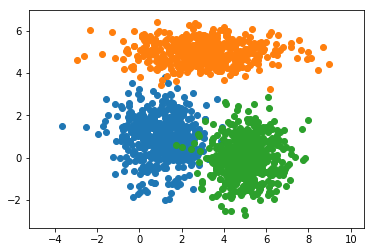

In [8]:
#CodeRead. Do not touch this cell.

mu1=np.array([[1.,1]])
mu2=np.array([[3.,5.]])
mu3=np.array([[5.,0.]])

Sigma1=np.array([[1.,0.],[0.,1.]])
Sigma2=np.array([[3.,0.],[0.,0.3]])
Sigma3=np.array([[1.,0.],[0.,1.]])

A1=np.linalg.cholesky(Sigma1)
A2=np.linalg.cholesky(Sigma2)
A3=np.linalg.cholesky(Sigma3)


X1=np.dot(np.random.randn(500,2),A1)+mu1
X2=np.dot(np.random.randn(500,2),A2)+mu2
X3=np.dot(np.random.randn(500,2),A1)+mu3

plt.axis('equal')
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])


X=np.concatenate((X1,X2,X3),axis=0)

np.random.shuffle(X)
del mu1
del mu2
del mu3
del Sigma1
del Sigma2
del Sigma3


In [9]:
#CodeWrite
np.random.seed(0)
def Log_likelihood(X,mu,pi,sigma):
    temp = np.zeros(X.shape[0])
    temp2 = np.zeros(3)
    # log likelihood
    for i in range(len(X)):
        for k in range(3):
            term1 = np.dot(np.dot(X[i]-mu[k],np.linalg.inv(sigma[k])),np.transpose(X[i]-mu[k]))
            temp2[k] = pi[k]/(np.sqrt(2*np.pi*np.linalg.det(sigma[k])))*np.exp(-0.5*term1)
        temp[i] = np.log(np.sum(temp2))
    LL = np.sum(temp)
    return(LL)

def cal_Gamma(X,mu,pi,sigma):
    temp3 = np.zeros((X.shape[0],3))
    for i in range(len(X)):
        for k in range(3):
            term1 = np.dot(np.dot(X[i]-mu[k],np.linalg.inv(sigma[k])),np.transpose(X[i]-mu[k]))
            temp3[i,k] = pi[k]/(np.sqrt(2*np.pi*np.linalg.det(sigma[k])))*np.exp(-0.5*term1)            
    temp4 = np.sum(temp3, axis =1)
    temp5 = np.concatenate((temp4[:,None],temp4[:,None],temp4[:,None]),axis=1)
    Gamma = temp3/temp5
    return(Gamma)

def cal_params(X,Gamma):
    N_k = np.sum(Gamma,axis = 0)
    mu = np.zeros((3,X.shape[1]))
    pi = N_k/len(X)
    sigma = []
    for k in range(3):
        temp_G = Gamma[:,k]
        GG    = np.concatenate((temp_G[:,None],temp_G[:,None]),axis = 1)
        mu[k] = 1/N_k[k]*np.sum(GG*X,axis =0)
        sig   = 1/N_k[k]*np.dot(np.transpose(X-mu[k]),GG*(X-mu[k]))
        sigma.append(sig)
    return(pi,mu,sigma)
            
# initial values 
pi1 = 1/3
pi2 = 1/3
pi3 = 1/3
#mui=np.random.randint(6)
mu1=np.random.randn(1,2)
mu2=np.random.randn(1,2)
mu3=np.random.randn(1,2)
Sigma1=np.array([[1.,0.],[0.,1.]])
Sigma2=np.array([[1.,0.],[0.,1.]])
Sigma3=np.array([[1.,0.],[0.,1.]])

# Sigma1=np.array([[1.,0.],[0.,1.]])
# Sigma2=np.array([[3.,0.],[0.,0.3]])
# Sigma3=np.array([[1.,0.],[0.,1.]])

pi = [pi1,pi2,pi3]
mu = [mu1,mu2,mu3]
sigma = [Sigma1,Sigma2,Sigma3]
LL_init = Log_likelihood(X,mu,pi,sigma)
print(LL_init)    
LL = LL_init + 100
while(abs(LL_init - LL)>1e-10):
    LL_init = Log_likelihood(X,mu,pi,sigma)
    Gamma = cal_Gamma(X,mu,pi,sigma)
    pi,mu,sigma = cal_params(X,Gamma)
    LL = Log_likelihood(X,mu,pi,sigma)
    
for i in range(3):    
    print("pi"+str(i+1)+ " = ",pi[i])
for i in range(3):    
    print("mu"+str(i+1)+ " = ",mu[i])
for i in range(3):    
    print("sigma"+str(i+1)+ " = ")
    print(sigma[i])


-9709.03059128
pi1 =  0.341238505168
pi2 =  0.330688797396
pi3 =  0.328072697436
mu1 =  [ 1.03686248  1.00882844]
mu2 =  [ 3.03548751  5.00093134]
mu3 =  [ 5.03036578 -0.02586762]
sigma1 = 
[[ 1.18111959 -0.06461652]
 [-0.06461652  1.07679974]]
sigma2 = 
[[ 3.29297028 -0.04002831]
 [-0.04002831  0.27044333]]
sigma3 = 
[[ 0.8615104   0.06792219]
 [ 0.06792219  0.92281055]]


TextWrite. Give the estimated $\pi_k$, $\mu_k$ and $\Sigma_k$ for $k\in\{1,2,3\}$

## Estimated values of  $\pi_k$, $\mu_k$ and $\Sigma_k$ for $k\in\{1,2,3\}$
$\pi_1$ =  0.327262762479   
$\pi_2$ =  0.332546676745  
$\pi_3$ =  0.340190560776

$\mu_1$ =  [ 0.96152714  1.02059788]    
$\mu_2$ =  [ 3.03448405  4.96265863]    
$\mu_3$ =  [ 4.96089038 -0.06533908]

$\Sigma_1$ =   
[[ 0.93616204  0.0676108]  
 [ 0.0676108  0.97413173]]
 
$\Sigma_2$ =   
[[ 2.96475973     -5.88720714e-4]  
 [ -5.88720714e-4    2.75095274e-1]]
 
$\Sigma_3$ =    
[[ 1.22097961  -0.0035243]  
 [ -0.0035243  1.01926125]]